<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/CutRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

La programación dinámica es un metodo similar al ya visto metodo de "divide y vencerás", ambos dividen el problema original en subproblemas y con las soluciones de estos subproblemas, si se combinan, se consigue la respuesta al problema original. 

Para poder aplicar la programación dinámica los subproblemas deben compartir soluciones, esto es debido a que si un subproblema ya fue resuelto con anterioridad solamente se debe buscar el valor que resulto al resolverlo por primera vez, esto se hace para no tener que resolver los mismos subproblemas más de una sola vez.

La programación dinámica puede ser útil en algoritmos de optimización, como es en este caso con el algoritmo del $cutting Rod$, donde se ingresará un arreglo de precios dependiendo de la longitud y donde se debe retornar el mayor beneficio que se puede conseguir de una varilla.

Entrada: arreglo $p$ de tamaño $n$ que es el arreglo con los precios dependiendo de la longitud de la varilla

Salida: valor máximo del beneficio que se puede sacar de la varilla cortada.


#2. Descripción del algoritmo

El algoritmo del $Cutting Rod$ es un algoritmo de optimización, en el que se busca sacar el mayor beneficio de una varilla de metal de longitud n, a la cual se le van realizando cortes, con cada longitud teniendo un precio. Este algoritmo va diviendo el arreglo inicial, creando subproblemas hasta llegar a un caso base, y desde ese momento se empieza a calcular el retorno máximo.

Pasos que realiza el algoritmo:

1) el algoritmo divide el arreglo en todos los cortes posibles

2) se calcula el retorno máximo de cada corte y se comparan con los demás hasta encontrar el máximo

Se puede encontrar que este algoritmo presenta una subestructura óptima debido a que:

1) está constantemente realizando elecciones al estar generando subproblemas con cada corte que se produce.

2) se revisa cada corte para ver si la solucion que entrega es la óptima.

3) con las soluciones de los subproblemas (cortes) se entrega el valor máximo de los cortes, utilizando soluciones óptimas de los subproblemas para conseguir la solución óptima del problema.

La función de recursividad de del algoritmo "Cutting Rod" es:

 max(valMax, p[i]+ cutRodRecursivo(p,n-i-1) 

 Aqui se busca el valor máximo entre el valor máximo guardado con anterioridad con el valor de un corte menor. De esta forma se esta recursivamente reduciendo el tamaño de la varilla y calculando el valor máximo del corte.





#2.1 Implementación para crear arreglos de precios
Se utilizará más adelante con las implementaciones del algoritmo "Cutting rod"

In [1]:
import random

def cutrod_instance_generator(N):
  A = []
  prev = 0
  for i in range(N):
    r=random.randint(0,10)
    A.append(prev+r)
    prev+=r
  return A

#2.2 Cutting Rod implementado de forma recursiva
Se utilizan arreglos de precios de tamaño 4 debido a la cantidad de llamadas que el algoritmo realiza, por lo que el verbose con un arreglo de tamaño 10, que es el que se utilizará luego con programación dinámica quedaría muy extenso.

In [199]:
llamadasRecursivas = 0
indice = 0
def cutRodRecursivo(p,n,verbose):
  global llamadasRecursivas
  global indice
  if n == 0:
    return 0

  aux = float("-inf")

  for i in range(0,n):
    aux2 = aux
    aux = max(aux, p[i]+ cutRodRecursivo(p,n-i-1,verbose))
    if aux != aux2:
      indice = i
    llamadasRecursivas += 1
    if verbose:
      print(f"valor máximo encontrado hasta el momento es {aux} con una varilla de largo {i+1}\n")
  return aux

In [216]:
a = cutrod_instance_generator(4)
print(f"Arreglo de precios: {a}")
n = len(a)
verbose = False

q = cutRodRecursivo(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {llamadasRecursivas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
llamadasRecursivas = 0

Arreglo de precios: [2, 10, 19, 26]
valor máximo es 26, encontrado en 15 llamadas, con los cortes [2, 10, 19] y [26]


In [232]:
a = cutrod_instance_generator(4)
print(f"Arreglo de precios: {a}")
n = len(a)
verbose = True

q = cutRodRecursivo(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {llamadasRecursivas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
llamadasRecursivas = 0

Arreglo de precios: [0, 4, 11, 14]
valor máximo encontrado hasta el momento es 0 con una varilla de largo 1

valor máximo encontrado hasta el momento es 0 con una varilla de largo 1

valor máximo encontrado hasta el momento es 4 con una varilla de largo 2

valor máximo encontrado hasta el momento es 4 con una varilla de largo 1

valor máximo encontrado hasta el momento es 0 con una varilla de largo 1

valor máximo encontrado hasta el momento es 4 con una varilla de largo 2

valor máximo encontrado hasta el momento es 11 con una varilla de largo 3

valor máximo encontrado hasta el momento es 11 con una varilla de largo 1

valor máximo encontrado hasta el momento es 0 con una varilla de largo 1

valor máximo encontrado hasta el momento es 0 con una varilla de largo 1

valor máximo encontrado hasta el momento es 4 con una varilla de largo 2

valor máximo encontrado hasta el momento es 11 con una varilla de largo 2

valor máximo encontrado hasta el momento es 0 con una varilla de largo 1



#2.3 Cutting Rod implementado con programación dinámica

In [275]:
cantidadSubproblemas = 0
def cutRodBottomUp(p,n,verbose):
  memoria = [0] * 10
  global cantidadSubproblemas
  global indice

  if n == 0:
    if verbose:
      print("varilla de tamaño 0, retornando")
    return 0

  if verbose:
    print(f"arreglo entrante de precios: {p}")

  for j in range(0,n):
    if verbose:
      print(f"analizando varilla de largo {j+1}")
    aux = float("-inf")
    aux2 = 0
    for i in(1,j):
      cantidadSubproblemas += 1
      aux2 = aux
      aux = max(aux, p[i] + memoria[j-i-1])
      if aux != aux2:
        indice = i+1
      if verbose:
        print(f"valor máximo encontrado entre {aux} y {p[i] + memoria[j-i-1]} es: {aux}\n")
    memoria[j] = aux
  return aux

In [279]:
#a = cutrod_instance_generator(10)
a = [1,5,8,9,10,17,17,20]
n = len(a)
verbose = False

q = cutRodBottomUp(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {cantidadSubproblemas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
cantidadSubproblemas = 0

valor máximo es 22, encontrado en 16 llamadas, con los cortes [1, 5] y [8, 9, 10, 17, 17, 20]


In [281]:
a = cutrod_instance_generator(10)
n = len(a)
verbose = True

q = cutRodBottomUp(a,n,verbose)
print(f"valor máximo es {q}, encontrado en {cantidadSubproblemas} llamadas, con los cortes {a[:indice]} y {a[indice:]}")
cantidadSubproblemas = 0

arreglo entrante de precios: [9, 17, 21, 31, 39, 48, 51, 53, 56, 61]
analizando varilla de largo 1
valor máximo encontrado entre 17 y 17 es: 17

valor máximo encontrado entre 17 y 9 es: 17

analizando varilla de largo 2
valor máximo encontrado entre 17 y 17 es: 17

valor máximo encontrado entre 17 y 17 es: 17

analizando varilla de largo 3
valor máximo encontrado entre 34 y 34 es: 34

valor máximo encontrado entre 34 y 21 es: 34

analizando varilla de largo 4
valor máximo encontrado entre 34 y 34 es: 34

valor máximo encontrado entre 34 y 31 es: 34

analizando varilla de largo 5
valor máximo encontrado entre 51 y 51 es: 51

valor máximo encontrado entre 51 y 39 es: 51

analizando varilla de largo 6
valor máximo encontrado entre 51 y 51 es: 51

valor máximo encontrado entre 51 y 48 es: 51

analizando varilla de largo 7
valor máximo encontrado entre 68 y 68 es: 68

valor máximo encontrado entre 68 y 51 es: 68

analizando varilla de largo 8
valor máximo encontrado entre 68 y 68 es: 68

va

#3 Tiempo de ejecucción

La siguiente función nos entrega que la cantidad de subproblemas que se deben resolver para una entrada de $n$ datos.

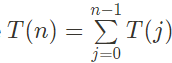

Esta ecuación nos entrega que se necesita resolver $2^n$ subproblemas para una entrada de datos de tamaño $n$.

El tiempo de ejecucción para el algoritmo completo es de $O(n^2)$ debido a la necesidad de tener dos ciclos $for$ anidados para poder utilizar el metodo $bottom-up$ del algoritmo. El tiempo de ejecucción de los subproblemas, al únicamente estarse recorriendo y comparando valores tienen el valor de $O(n)$. Por último, la complejidad espacial del algoritmo es de $O(n)$, debido a que debe almacenar $n$ datos extras que son los valores máximos de cada longitud.

#4 Correctitud

Caso base:
Cuando n = 0, ya se encuentra el valor máximo del beneficio posible, ya que este valor siempre es el mismo (0)

Mantención: Luego de una n-ésima iteración, dentro del segundo for el algoritmo verifica y almacena en caso de que el valor sea mayor al máximo anterior, por lo que luego de la iteración, puede asegurarse que se guarda el máximo precio hasta el momento.

